# GTFSUtils Quickstart

## Table of Contents

- Load GTFS file
- Visualize routes
- Visualize shapes
- Visualize stops
- Spatial filter by trip shapes (Within)
- Spatial filter by trip shapes (Intersects)
- Spatial filter by stop locations
- Filter by agency
- Save filtered GTFS file

# Load a GTFS file

We use the GTFS of Vienna as an example:

- Open Data Austria - [Wiener Linien – Fahrplandaten GTFS Wien](https://www.data.gv.at/katalog/dataset/ab4a73b6-1c2d-42e1-b4d9-049e04889cf0)

In [1]:
%%bash
mkdir -p data
if [ ! -f "data/vienna.gtfs.zip" ]; then
  wget http://www.wienerlinien.at/ogd_realtime/doku/ogd/gtfs/gtfs.zip \
    -qO data/vienna.gtfs.zip
fi

In [6]:
import shapely.geometry
import geopandas as gpd
import matplotlib.pyplot as plt

import gtfsutils
import gtfsutils.filter
import gtfsutils.routes

print(f"gtfsutils {gtfsutils.__version__}")

gtfsutils 0.0.4


In [7]:
%%time
bounds = [16.398134, 48.1352198, 16.5775132, 48.2935324]
gdf_bounds = gpd.GeoSeries(
    shapely.geometry.box(*bounds),
    crs='EPSG:4326').boundary

filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 2.81 s, sys: 400 ms, total: 3.21 s
Wall time: 3.21 s


In [8]:
# Show available dataframes
df_dict.keys()

dict_keys(['stops', 'stop_times', 'calendar', 'calendar_dates', 'shapes', 'routes', 'trips', 'agency'])

In [9]:
gtfsutils.print_info(df_dict)


GTFS files:
  agency.txt                      2 rows
  calendar.txt                  186 rows
  calendar_dates.txt          9,575 rows
  routes.txt                    441 rows
  shapes.txt                401,371 rows
  stop_times.txt          3,733,781 rows
  stops.txt                   4,510 rows
  trips.txt                 201,042 rows

Calender date range:
  11.12.2022 - 09.12.2023

Bounding box:
  [16.1977025532707, 47.9995020902886, 16.5494019702052, 48.3011051975429]



# Visualize Routes

In [10]:
%%time
gdf_routes = gtfsutils.routes.load_routes_counts(df_dict)

CPU times: user 540 ms, sys: 2.73 ms, total: 542 ms
Wall time: 542 ms


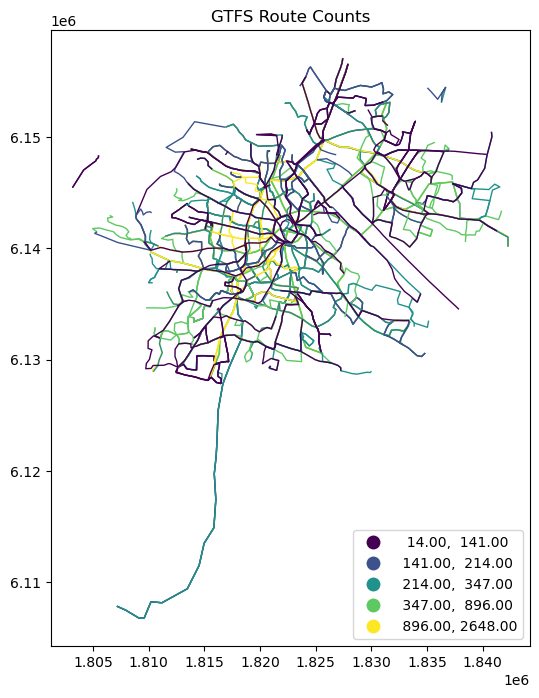

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf_plot = gdf_routes.to_crs(epsg=3857)
gdf_plot.plot(
    ax=ax, linewidth=1, alpha=1, 
    column='counts', cmap='viridis', scheme='quantiles', 
    legend=True, legend_kwds={'loc': 'lower right'})
ax.set_title("GTFS Route Counts");

# Visualize Shapes

In [12]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 1.5 s, sys: 7.14 ms, total: 1.5 s
Wall time: 1.5 s


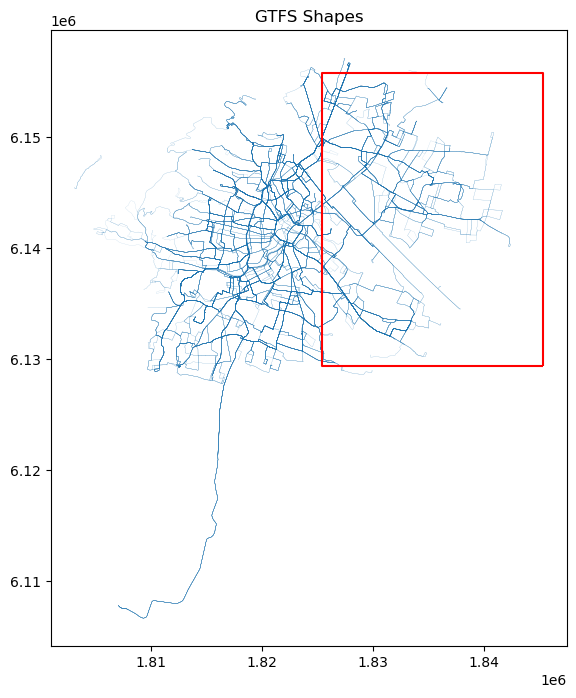

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS Shapes");

# Visualize stops

In [14]:
%%time
gdf = gtfsutils.load_stops(df_dict)

CPU times: user 20.7 ms, sys: 157 µs, total: 20.8 ms
Wall time: 18 ms


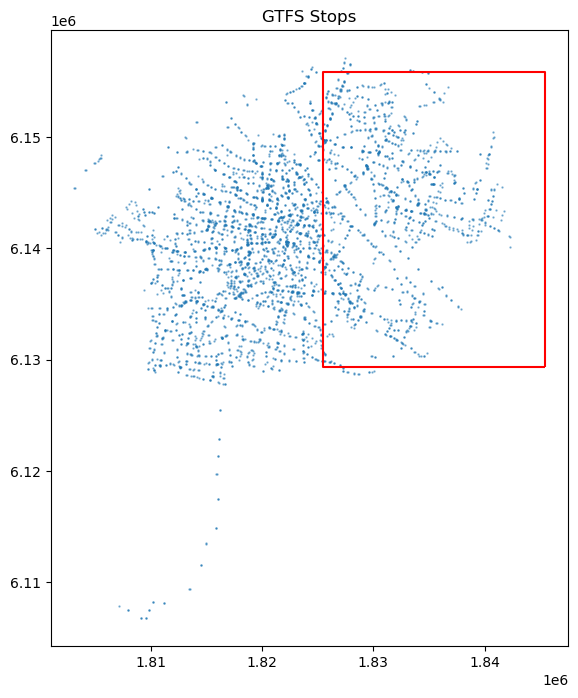

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, markersize=0.5, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS Stops");

# Spatial filter by trip shapes (Within)

In [18]:
%%time
gtfsutils.filter.spatial_filter_by_shapes(
    df_dict, bounds, operation='within')

CPU times: user 1.63 s, sys: 12.7 ms, total: 1.64 s
Wall time: 1.64 s


In [19]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 280 ms, sys: 3.3 ms, total: 283 ms
Wall time: 280 ms


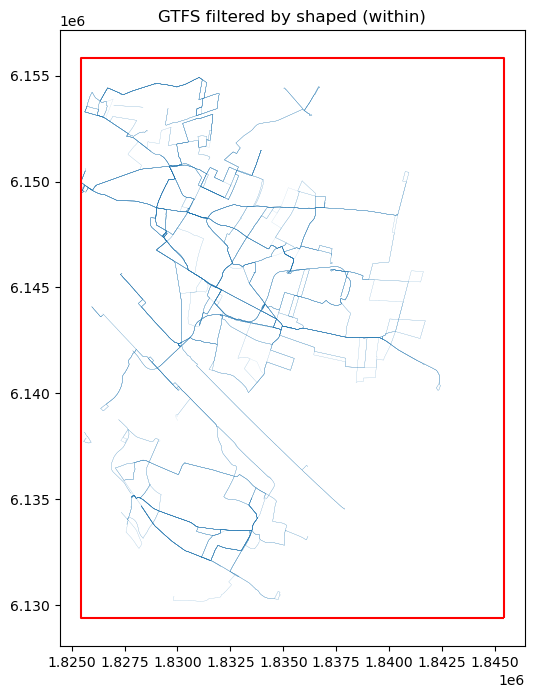

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS filtered by shaped (within)");

# Spatial filter by trip shapes (Intersects)

In [21]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 3.07 s, sys: 508 ms, total: 3.57 s
Wall time: 3.58 s


In [22]:
%%time
gtfsutils.filter.spatial_filter_by_shapes(
    df_dict, bounds, operation='intersects')

CPU times: user 1.8 s, sys: 24.3 ms, total: 1.83 s
Wall time: 1.83 s


In [23]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 660 ms, sys: 68 µs, total: 660 ms
Wall time: 659 ms


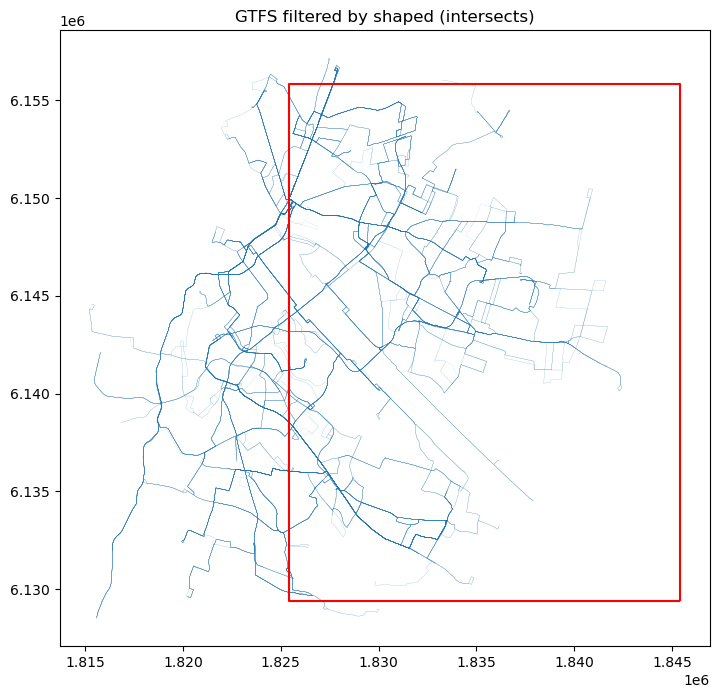

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS filtered by shaped (intersects)");

# Spatial filter by stop locations

In [25]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 2.98 s, sys: 444 ms, total: 3.43 s
Wall time: 3.43 s


In [26]:
%%time
gtfsutils.filter.spatial_filter_by_stops(
    df_dict, bounds)

CPU times: user 337 ms, sys: 16.2 ms, total: 354 ms
Wall time: 352 ms


In [27]:
%%time
gdf_shapes = gtfsutils.load_shapes(df_dict)
gdf_stops = gtfsutils.load_stops(df_dict)

CPU times: user 610 ms, sys: 232 µs, total: 610 ms
Wall time: 607 ms


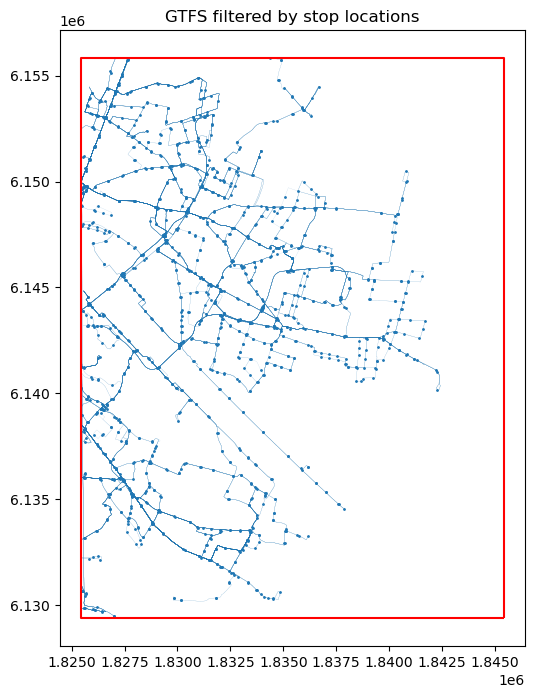

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf_shapes.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_stops.to_crs(epsg=3857).plot(ax=ax, markersize = 1)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS filtered by stop locations");

# Filter by Agency

In [30]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 2.89 s, sys: 324 ms, total: 3.22 s
Wall time: 3.22 s


In [31]:
df_dict['agency']

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,3,WLB,https://www.wlb.at/,Europe/Vienna,DE,+43 (0) 1/ 90 444
1,4,Wiener Linien,https://www.wienerlinien.at/,Europe/Vienna,DE,+43 (0)1 7909 - 0


In [32]:
%%time
gtfsutils.filter.filter_by_agency_ids(df_dict, [4])

CPU times: user 417 ms, sys: 10.9 ms, total: 428 ms
Wall time: 427 ms


In [33]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 1.49 s, sys: 68 µs, total: 1.49 s
Wall time: 1.49 s


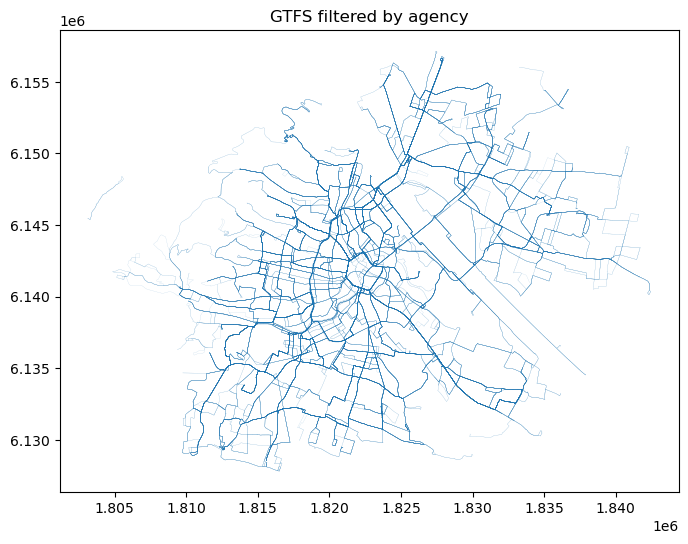

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
ax.set_title("GTFS filtered by agency");

# Save Filtered GTFS File

In [36]:
%%time
filepath = "data/vienna-filtered.gtfs.zip"
gtfsutils.save_gtfs(df_dict, filepath, ignore_required=True, overwrite=True)

CPU times: user 10.8 s, sys: 472 ms, total: 11.3 s
Wall time: 11.3 s
